In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import powerlaw
import os
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import linregress

# Working with Distributions

In [3]:
# reading csv files
data1 =  pd.read_csv('Seq1.data', sep=",", names=['Seq1'])
print(f'Seq1: {data1.shape}')
data2 =  pd.read_csv('Seq2.data', sep=",",names=['Seq2'])
print(f'Seq2: {data2.shape}')

Seq1: (100000, 1)
Seq2: (100000, 1)


In [106]:
data1['Seq1'].describe()

count    100000.000000
mean        104.057711
std          20.999325
min          20.249381
25%          89.889402
50%         104.063986
75%         118.203174
max         196.462015
Name: Seq1, dtype: float64

In [107]:
data2['Seq2'].describe()

count    1.000000e+05
mean     9.784254e+02
std      8.040380e+04
min      1.000007e+01
25%      1.432274e+01
50%      2.383249e+01
75%      5.678261e+01
max      2.035272e+07
Name: Seq2, dtype: float64

# a. linear binning

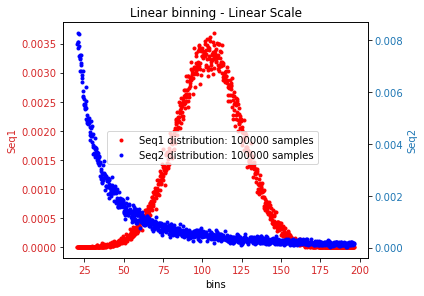

In [156]:
#seq1 and seq2: linear scale, linear binning (with double y-axis)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('bins')
ax1.set_ylabel('Seq1', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelcolor=color)

x = np.linspace(data1['Seq1'].min(), data1['Seq1'].max(), 1000)
y, x  = np.histogram(data1['Seq1'], x)
x = (x[1:] + x[:-1])/2

# plotting Seq1 distribution 
ax1.plot(x, y/y.sum(), '.', color = 'red',label=f'Seq1 distribution: {len(data1)} samples')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Seq2', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)



y, x  = np.histogram(data2['Seq2'], x)
x= (x[1:] + x[:-1])/2

# plotting Seq2 distribution 
ax2.plot(x, y/y.sum(), '.', color = 'blue',label=f'Seq2 distribution: {len(data2)} samples')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.set_title('Linear binning - Linear Scale')

fig.legend(loc='center')

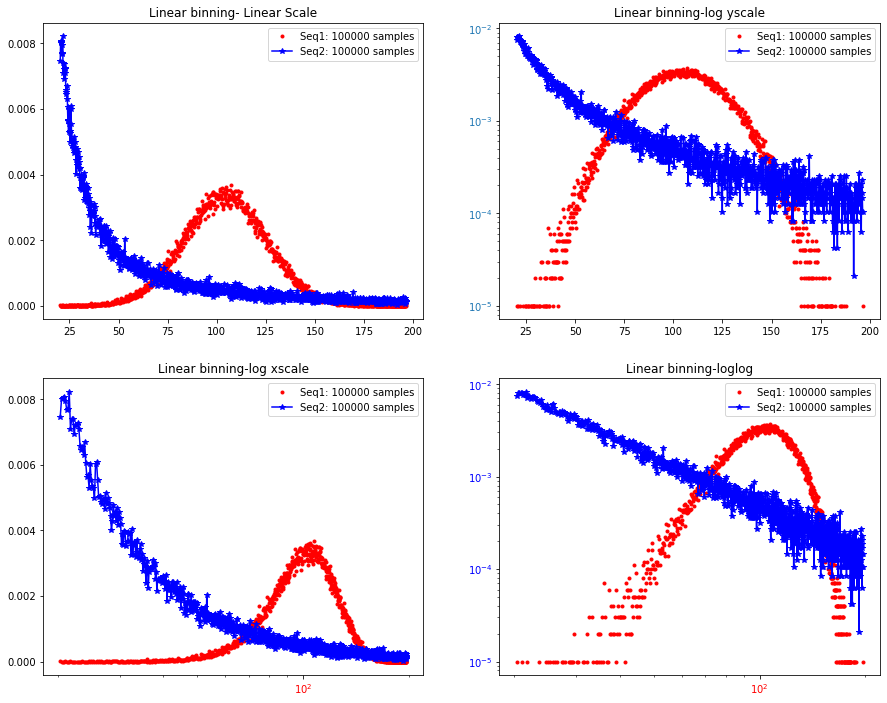

In [183]:
# seq1 and seq2: Linear binning  in several scale options 
        
x =np.linspace(data1['Seq1'].min(), data1['Seq1'].max(), 1000)
y_data1, x  = np.histogram(data1['Seq1'], x)
y_data2, x  = np.histogram(data2['Seq2'], x)
x = (x[1:] + x[:-1])/2.




fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x, y_data1/y_data1.sum(), '.', color = 'red',label=f'Seq1: {len(data1)} samples')
        ax[i][j].plot(x, y_data2/y_data2.sum(), '*-', color = 'blue',label=f'Seq2: {len(data2)} samples')
        ax[i][j].legend()
        ax[i][j].set_title('Linear binning- Linear Scale')
        if i==1 and j==0:
            ax[i][j].set_xscale('log')
            ax[i][j].tick_params(axis='x', labelcolor='red')
            ax[i][j].legend()
            ax[i][j].set_title('Linear binning-log xscale')
        if i==0 and j==1:
            ax[i][j].set_yscale('log')
            ax[i][j].tick_params(axis='y', labelcolor=color)
            ax[i][j].legend()
            ax[i][j].set_title('Linear binning-log yscale')
        if i==1 and j==1:
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log')
            ax[i][j].tick_params(axis='x', labelcolor='red')
            ax[i][j].tick_params(axis='y', labelcolor='blue')
            ax[i][j].legend()
            ax[i][j].set_title('Linear binning-loglog')
            

# b. logarithmic binning

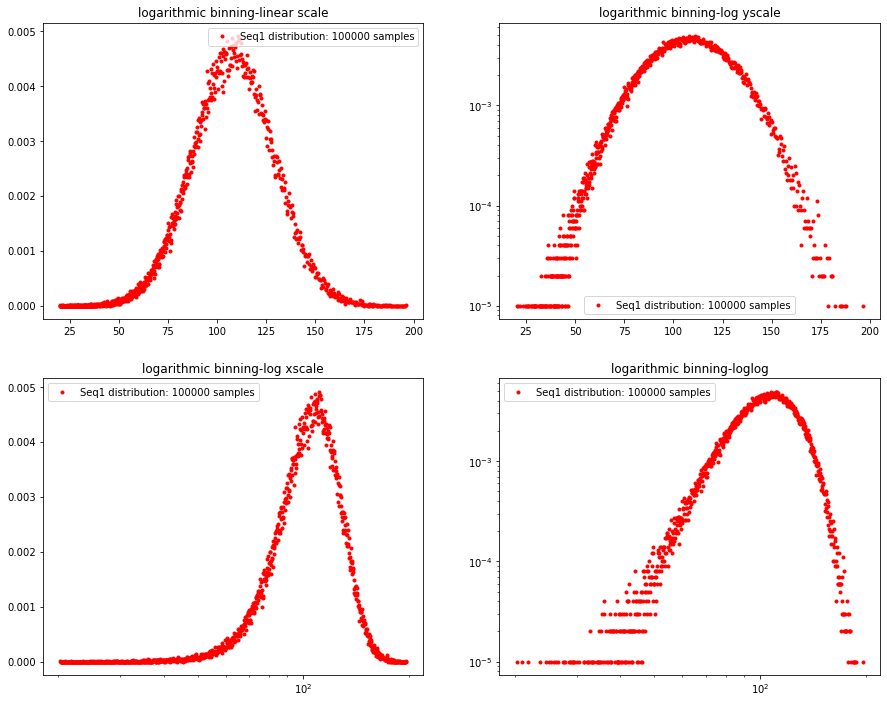

In [184]:
# Seq1: log binning in several scale options
x = np.logspace(np.log10(data1['Seq1'].min()), np.log10(data1['Seq1'].max()), 1000)
y_data, x  = np.histogram(data1['Seq1'], x)
x = (x[1:] + x[:-1])/2.


fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x, y_data/y_data.sum(), '.', color = 'red',label=f'Seq1 distribution: {len(data1)} samples')
        ax[i][j].legend()
        ax[i][j].set_title('logarithmic binning-linear scale')
        if i==1 and j==0:
            ax[i][j].set_xscale('log')
            ax[i][j].set_title('logarithmic binning-log xscale')
            ax[i][j].legend()
        if i==0 and j==1:
            ax[i][j].set_yscale('log')
            ax[i][j].set_title('logarithmic binning-log yscale')
            ax[i][j].legend()
        if i==1 and j==1:
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
            ax[i][j].set_title('logarithmic binning-loglog')
            ax[i][j].legend()

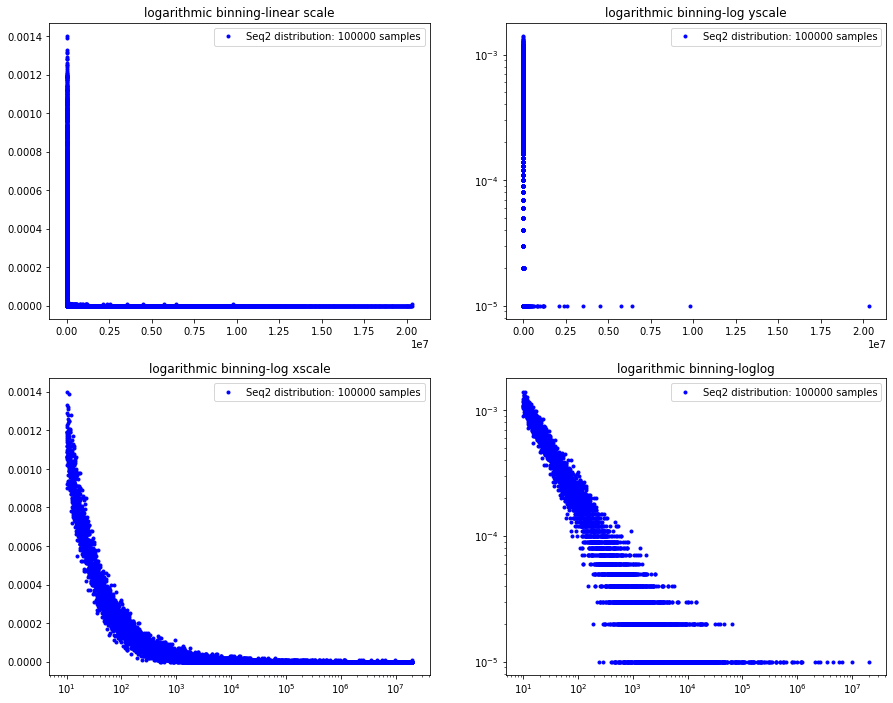

In [185]:
# Seq2: log binning in several scale options

x = np.logspace(np.log10(data2['Seq2'].min()), np.log10(data2['Seq2'].max()), 10000)
y_data, x  = np.histogram(data2['Seq2'], x)
x = (x[1:] + x[:-1])/2.


fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x, y_data/y_data.sum(), '.', color = 'blue',label=f'Seq2 distribution: {len(data2)} samples')
        ax[i][j].legend()
        ax[i][j].set_title('logarithmic binning-linear scale')
        if i==1 and j==0:
            ax[i][j].set_xscale('log')
            ax[i][j].set_title('logarithmic binning-log xscale')
            ax[i][j].legend()
        if i==0 and j==1:
            ax[i][j].set_yscale('log')
            ax[i][j].set_title('logarithmic binning-log yscale')
            ax[i][j].legend()
        if i==1 and j==1:
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
            ax[i][j].set_title('logarithmic binning-loglog')
            ax[i][j].legend()  

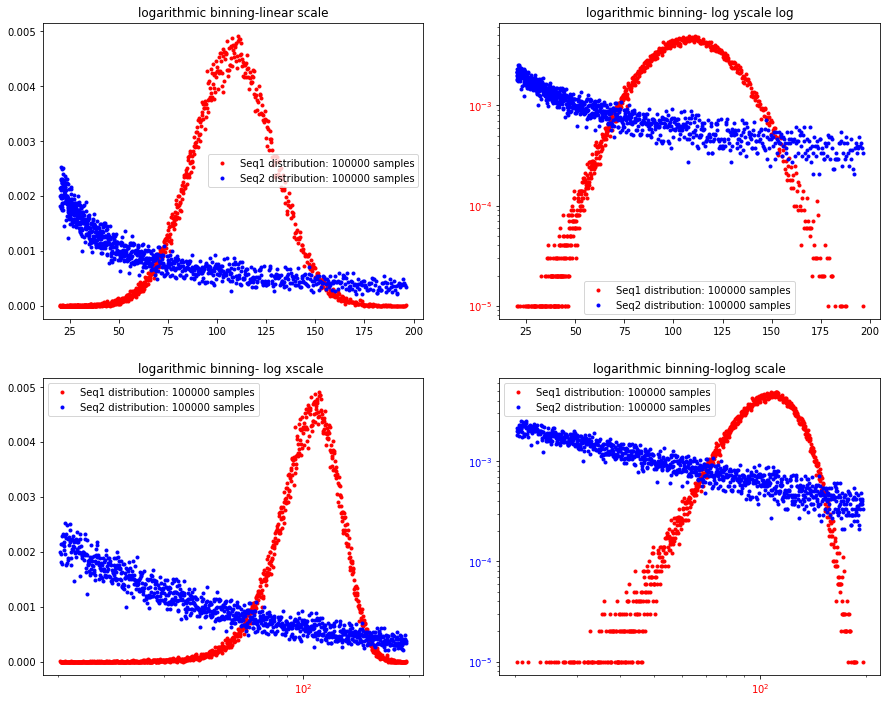

In [186]:
# seq1 and seq2: log binning  in several scale options 

x = np.logspace(np.log10(data1['Seq1'].min()), np.log10(data1['Seq1'].max()), 1000)

y_data1, x1  = np.histogram(data1['Seq1'], x)
y_data2, x2  = np.histogram(data2['Seq2'], x)
x1 = (x1[1:] + x1[:-1])/2.
x2 = (x2[1:] + x2[:-1])/2.


fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x1, y_data1/y_data1.sum(), '.', color = 'red',label=f'Seq1 distribution: {len(data1)} samples')
        ax[i][j].plot(x2, y_data2/y_data2.sum(), '.', color = 'blue',label=f'Seq2 distribution: {len(data2)} samples')
        ax[i][j].legend()
        ax[i][j].set_title('logarithmic binning-linear scale')
        if i==1 and j==0:
            ax[i][j].set_xscale('log')
            ax[i][j].set_title('logarithmic binning- log xscale ')
            ax[i][j].legend()
            ax[i][j].tick_params(axis='x', labelcolor='red')
        if i==0 and j==1:
            ax[i][j].set_yscale('log')
            ax[i][j].set_title('logarithmic binning- log yscale log')
            ax[i][j].legend()
            ax[i][j].tick_params(axis='y', labelcolor='red')
        if i==1 and j==1:
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
            ax[i][j].set_title('logarithmic binning-loglog scale')
            ax[i][j].legend()
            ax[i][j].tick_params(axis='x', labelcolor='red')
            ax[i][j].tick_params(axis='y', labelcolor='blue')

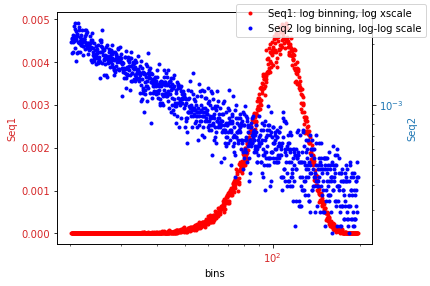

In [187]:
#log binning: seq1 (xscale log) and seq2 (log-log):  

fig, ax1 = plt.subplots()


# plotting Seq1 distribution 

x = np.logspace(np.log10(data1['Seq1'].min()), np.log10(data1['Seq1'].max()), 1000)
y, x  = np.histogram(data1['Seq1'], x)
x = (x[1:] + x[:-1])/2

color = 'tab:red'
ax1.set_xlabel('bins')
ax1.set_ylabel('Seq1', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.plot(x, y/y.sum(), '.', color = 'red',label=f'Seq1: log binning, log xscale ')



# plotting Seq2 distribution 

y, x  = np.histogram(data2['Seq2'], x)
x= (x[1:] + x[:-1])/2

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Seq2', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(x, y/y.sum(), '.', color = 'blue',label=f'Seq2 log binning, log-log scale')
ax2.set_yscale('log')
ax2.set_xscale('log')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend()

# c. Which distribution can be described by Gaussian? Find its parameters. 

In [189]:
print('Seq1 distribution (linear binning - linear scale) can be described by  Gaussian.')
print('Parameters:')
mu=data1['Seq1'].mean()
sigma=data1['Seq1'].std()
print('mu=',mu,'sigma=',sigma)

Seq1 distribution (linear binning - linear scale) can be described by  Gaussian.
Parameters:
mu= 104.05771096647106 sigma= 20.999325350502772


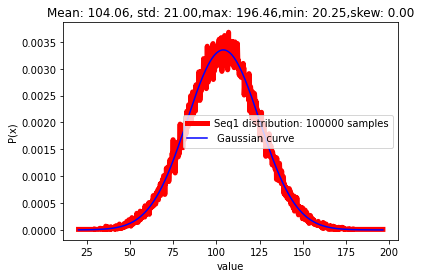

In [190]:
y, x = np.histogram(data1, bins =  np.linspace(data1['Seq1'].min(), data1['Seq1'].max(), 1000)) # compute histogram
x = x[:-1] +  np.diff(x)/2 # note that we remove empty bins (y==0)
plt.plot(x[y>0], y[y>0]/y.sum(), linewidth=5, color='red', label=f'Seq1 distribution: {len(data1)} samples')

y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-np.square(x-mu) / (2*sigma**2))
plt.plot(x, y/sum(y), color='blue', label=' Gaussian curve')
plt.xlabel('value'); plt.ylabel('P(x)')
plt.legend()
plt.title(f"Mean: {data1['Seq1'].mean():2.2f}, std: {data1['Seq1'].std():2.2f},max: {data1['Seq1'].max():2.2f},min: {data1['Seq1'].min():2.2f},skew: {skew(data1['Seq1']):2.2f}");

# d.  Analyze the other, power law, distribution using the logarithmic binning 

i. Why do you think this data set cannot be described by a normal distribution?

    Normal distribution: is the state in which variability of sample data points is similarly distributed before and after
    the mean value. The graph will show a bell-shaped curve that is symmetrical with the highest center at the mean value.
    In other words, more sample data is present around the mean value, which decreases as the value moves toward the left 
    and right edges of the curve (as wee see in the above graph, the maximum value is very close to the mean of the 
    distribution, the minimum values lie on the left tail and the right tail of the distribution and there is no skew).

    On the other hand, power-law distribution has more sample data with extreme value than normal distribution, drawing 
    a curve with a long tail lowering as the value increases(as we see in the two graphs below the maximum value is far 
    from the mean value, to the right is the long tail, and to the left are the few that dominate, the data skewed right).

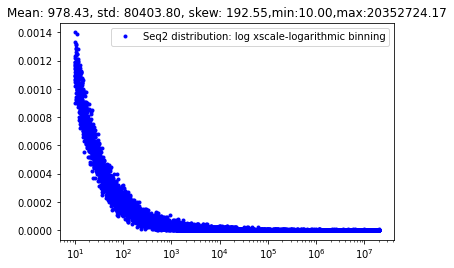

In [5]:
#  log xscale , logarithmic binning 
x = np.logspace(np.log10(data2['Seq2'].min()), np.log10(data2['Seq2'].max()), 10000)
y, x  = np.histogram(data2['Seq2'], x)
x = (x[1:] + x[:-1])/2.


# plotting the expected distribution 
plt.plot(x, y/y.sum(), '.', color = 'blue',label=f'Seq2 distribution: log xscale-logarithmic binning')

plt.xscale('log')
plt.legend()
#plt.yscale('log')
plt.title(f"Mean: {data2['Seq2'].mean():2.2f}, std: {data2['Seq2'].std():2.2f}, skew: {skew(data2['Seq2']):2.2f},min:{data2['Seq2'].min():2.2f},max:{data2['Seq2'].max():2.2f}");

# => If we try to fit Seq2 (power law) distribution with the Normal distribution curve

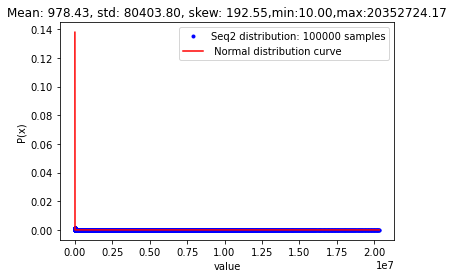

In [272]:
#  linear scale , logarithmic binning 

#normal distribution parameters:
sigma=1
mu=0

x = np.logspace(np.log10(data2['Seq2'].min()), np.log10(data2['Seq2'].max()), 10000)
y, x  = np.histogram(data2['Seq2'], x)
x = (x[1:] + x[:-1])/2.

# plotting the expected distribution 
plt.plot(x, y/y.sum(), '.', color = 'blue',label=f'Seq2 distribution: {len(data2)} samples')
plt.title(f"Mean: {data2['Seq2'].mean():2.2f}, std: {data2['Seq2'].std():2.2f}, skew: {skew(data2['Seq2']):2.2f},min:{data2['Seq2'].min():2.2f},max:{data2['Seq2'].max():2.2f}");

# fit normal distribution curve
y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-np.square(x-mu) / (2*sigma**2))
plt.plot(x, y/sum(y), color='red', label=' Normal distribution curve')
plt.xlabel('value'); plt.ylabel('P(x)')
plt.legend()

# ii. Assess the value of the exponent 𝛼 form the graph (without fitting, estimate ∆𝑦/∆𝑥) and briefly explain how you did it.



    * The traditional approach to estimating the power-law exponent is to fit a linear regression to log-transformed values of f(x) and x, with the slope of the line giving an estimate of the exponent alpha.

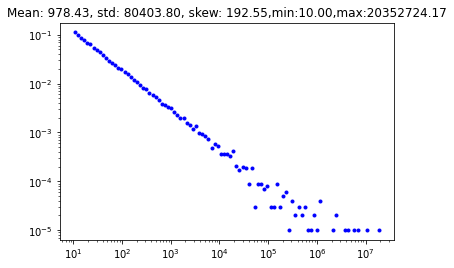

In [6]:
#  log-log  scale , logarithmic binning 
x = np.logspace(np.log10(data2['Seq2'].min()), np.log10(data2['Seq2'].max()), 100)
y, x  = np.histogram(data2['Seq2'], x)
x = (x[1:] + x[:-1])/2.

y = y/y.sum() # normalize y (sum[y]=1). This makes y - probability density function, PDF. 

# remove empty bins (otherwise np.log10(0)=-inf)
x = x[y!=0]
y = y[y!=0]


# plotting the expected distribution 
plt.plot(x, y, '.', color = 'blue',label=f'Seq2 distribution: {len(data2)} samples')

plt.xscale('log')
plt.yscale('log')

plt.title(f"Mean: {data2['Seq2'].mean():2.2f}, std: {data2['Seq2'].std():2.2f}, skew: {skew(data2['Seq2']):2.2f},min:{data2['Seq2'].min():2.2f},max:{data2['Seq2'].max():2.2f}");

In [9]:
slope, intercept, r_value, p_value, std_err = linregress(np.log10(x),np.log10(y))
print('Slope by linregress: ∆𝑦/∆𝑥=', slope)

slope, intercept = np.polyfit(np.log10(x),np.log10(y),1)
print('Slope by polyfit: ∆𝑦/∆𝑥=', slope)

Slope by linregress: ∆𝑦/∆𝑥= -0.7498626913374575
Slope by polyfit: ∆𝑦/∆𝑥= -0.7498626913374583


# iii. Fit the data and assess 𝛼. 

In [265]:
results = powerlaw.Fit(data2['Seq2'])

Calculating best minimal value for power law fit


In [286]:
print(f"xmin={results.power_law.xmin:2.4f}. ")

xmin=16.1981. 


In [267]:
print(f"Alpha={results.alpha:2.4f}. ")

Alpha=1.8013. 


# iv. Generate a figure with two plots:
    
1. Histogram of the power law distribution
2. The fit you have obtained (i.e. 𝑃(𝑥)~𝑥−𝛼 with the value for 𝛼 you have found and normalized so that ∑ 𝑃(𝑥) = 1)


Fit results: alpha=-0.7498626913374583, const = -0.2855639683275237


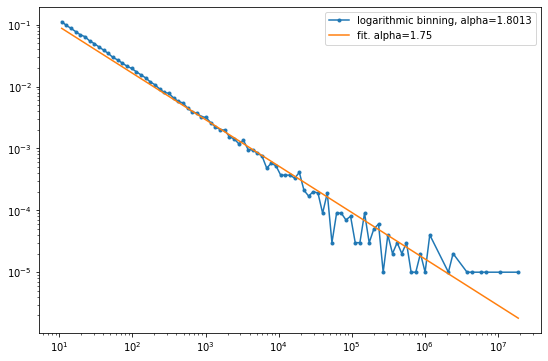

In [18]:
alpha = 1.8013

y,x = np.histogram(data2['Seq2'], np.logspace( np.log10(data2['Seq2'].min()), np.log10(data2['Seq2'].max()), 100))
x= (x[:-1]+x[1:])/2
y = y/y.sum() # normalize y (sum[y]=1). This makes y - probability density function, PDF. 

# remove empty bins (otherwise np.log10(0)=-inf)
x = x[y!=0]
y = y[y!=0]


## fitting to polynom
p = np.polyfit(np.log10(x), np.log10(y), deg=1) 
print(f"Fit results: alpha={p[0]}, const = {p[1]}")

plt.figure(figsize=(9,6))
plt.loglog(x, y, '.-', label=f'logarithmic binning, alpha={alpha}');

plt.loglog(x, np.power(10, np.polyval(p, np.log10(x))), label=f'fit. alpha={-p[0]+1:2.2f}' );
plt.legend()

# e. Repeat (d) ii, iii, iv using the cumulative distribution method. 

Having determined the CDF for a power-law distribution, the exponent, alpha, of the probability density function (PDF) can be estimated using regression. The traditional approach is to transform the equation for the CDF such that the slope of a linear equation is a function of alpha. The slope of the regression will be equal to alpha + 1, making it necessary to subtract 1 to obtain alpha.So we calculate the slope of the ccdf (red) graph below 

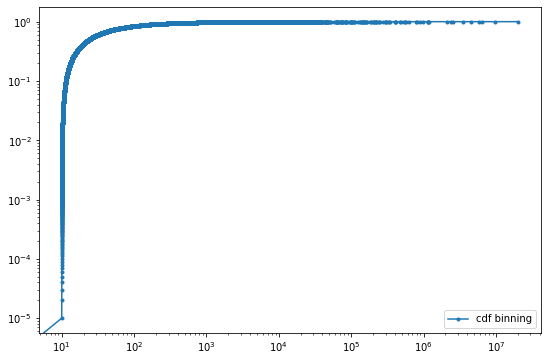

<Figure size 648x432 with 0 Axes>

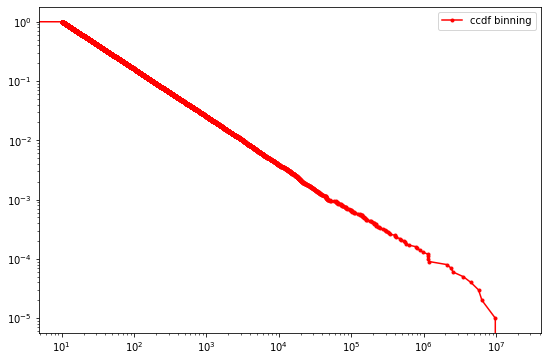

In [24]:
# ecdf
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data2['Seq2'])
x = ecdf.x
y = ecdf.y

plt.figure(figsize=(9,6))
plt.loglog(x, y, '.-', label='cdf binning');
plt.legend()

plt.figure(figsize=(9,6))
ecdf = ECDF(data2['Seq2'])
x1 = ecdf.x
y1 = 1-ecdf.y

plt.figure(figsize=(9,6))
plt.loglog(x1, y1, '.-', label='ccdf binning',color='red');
plt.legend()

In [25]:
slope, intercept, r_value, p_value, std_err = linregress(np.log10(x1[1:-1]),np.log10(y1[1:-1]))
print('Slope by linregress=∆𝑦/∆𝑥=', slope)

slope, intercept = np.polyfit(np.log10(x1[1:-1]),np.log10(y1[1:-1]),1)
print('Slope by polyfit=∆𝑦/∆𝑥=', slope)

Slope by linregress=∆𝑦/∆𝑥= -0.8010723785891913
Slope by polyfit=∆𝑦/∆𝑥= -0.8010723785891923


In [34]:
#alpha by fitting the data
results = powerlaw.Fit(data2['Seq2'])
print(f"xmin={results.power_law.xmin:2.4f}. ")
print(f"Alpha={results.alpha:2.4f}. ")

Calculating best minimal value for power law fit
xmin=16.1981.  99%
Alpha=1.8013. 


Fit results: alpha=-0.8010723785891923, const = 0.8021030955865621


Text(0.5, 1.0, 'Fitting the data by CDF to assess Alpha ')

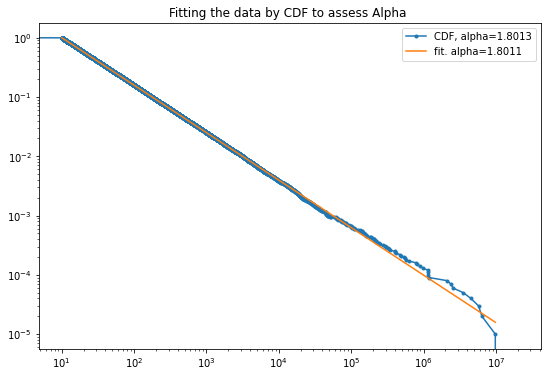

In [26]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data2['Seq2'])
x = ecdf.x
y = 1-ecdf.y

## fitting to polynom
p = np.polyfit(np.log10(x[1:-1]), np.log10(y[1:-1]), deg=1) 
print(f"Fit results: alpha={p[0]}, const = {p[1]}")


plt.figure(figsize=(9,6))
plt.loglog(x, y, '.-', label=f'CDF, alpha={alpha}');

plt.loglog(x[1:-1], np.power(10, np.polyval(p, np.log10(x[1:-1]))), label=f'fit. alpha={-p[0]+1:4.4f}' );
plt.legend()
plt.title('Fitting the data by CDF to assess Alpha ')

# f. Which of the  methods (a, b or e) is more reliable? Why? 

Linear binning performs poorly by practically any measure. In most cases it produces biased estimates of the exponent and its estimates are highly variable (as we see in the graph below). In addition, the estimated exponent is highly dependent on the choice of bin width, and this dependency varies as a function of sample size (as we will ses in question 2). While normalized logarithmic binning performs better than linear binning, its estimates are also dependent on the choice of bin width and are more variable than alternate approaches.So, we can say that the binning-based methods are sensitive to a variety of decisions, and it appears that no amount of tweaking will be able to produce a consistent binning-based method for estimating the exponent. 

In general, binning results in a loss of information about the distributions of points within a bin and is thus expected to perform poorly. Therefore, while binning is useful for visualizing the frequency distribution, and normalized logarithmic binning performs well at this task, binning-based approaches should be avoided for parameter estimation (Clauset et al. 2007).

The most reliable method is The CDF(We can see from the graph below that CDF is the best method to estimate alpha);it is straightforward to construct for a set of observed data, and no binning is required.  Analyzing the CDF avoids the subjective influence of the choice of bin width and the problem of empty bins.

Fit results: alpha=-0.8010723785891923, const = 0.8021030955865621
Fit results: alpha=-0.7498626913374583, const = -0.2855639683275237
Fit results: alpha=-1.5820645704303997, const = 5.499981273035905


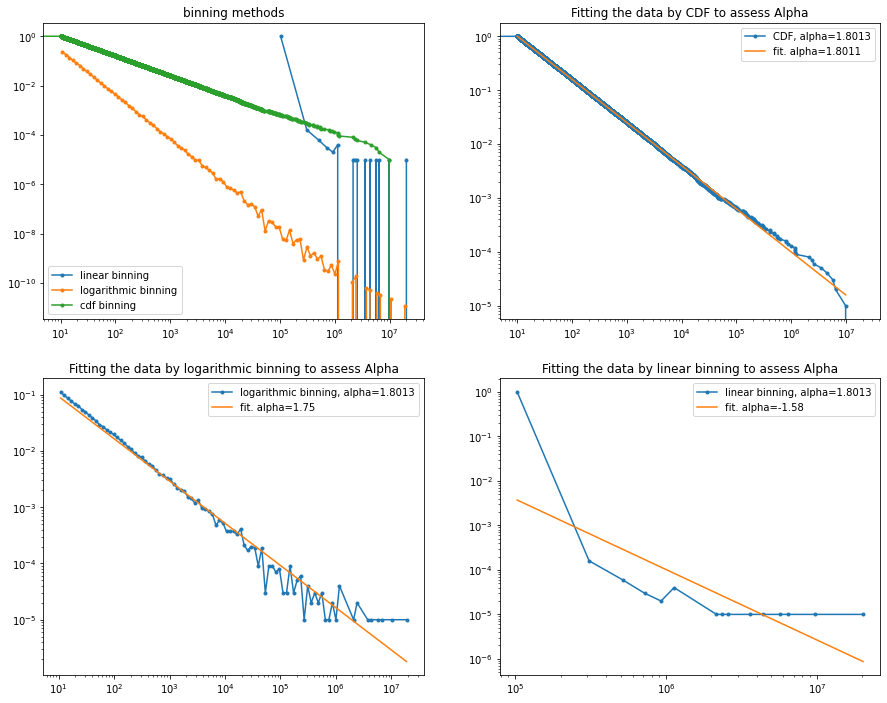

In [27]:
fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

for i in range(2):
    for j in range(2):
        
        if i==0 and j==0:
                
            y1, x1 = np.histogram(data2['Seq2'], bins = np.linspace( data2['Seq2'].min(), data2['Seq2'].max(), 100 ))
            y1 = y1/ y1.sum() # normalize y (sum[y]=1). This makes y - probability density function, PDF. 
            x1 = x1[:-1] + np.diff(x1)/2

            # logarithmic binning
            y2, x2 = np.histogram(data2['Seq2'], bins = np.logspace( np.log10(data2['Seq2'].min()), np.log10(data2['Seq2'].max()), 100 ))
            y2 = y2 / np.diff(x2) # divide y by width of every bin. y becomes density. 
            y2 = y2/ y2.sum() # normalize y (sum[y]=1). This makes y - probability density function, PDF. 
            x2 = x2[:-1] + np.diff(x2)/2

            # ecdf
            from statsmodels.distributions.empirical_distribution import ECDF
            ecdf = ECDF(data2['Seq2'])
            x3 = ecdf.x
            y3 = 1-ecdf.y

            ax[i][j].plot(x1, y1, '.-', label='linear binning');
            ax[i][j].plot(x2, y2, '.-', label='logarithmic binning');
            ax[i][j].plot(x3, y3, '.-', label='cdf binning');
            ax[i][i].legend()
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log')
            ax[i][j].set_title('binning methods')

        if i==0 and j==1:
            
            ecdf = ECDF(data2['Seq2'])
            x = ecdf.x
            y = 1-ecdf.y
            ## fitting to polynom
            p = np.polyfit(np.log10(x[1:-1]), np.log10(y[1:-1]), deg=1) 
            print(f"Fit results: alpha={p[0]}, const = {p[1]}")
            ax[i][j].plot(x, y, '.-', label=f'CDF, alpha={alpha}');
            ax[i][j].plot(x[1:-1], np.power(10, np.polyval(p, np.log10(x[1:-1]))), label=f'fit. alpha={-p[0]+1:4.4f}' );
            ax[i][j].legend()
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
            ax[i][j].set_title('Fitting the data by CDF to assess Alpha')
            
        if i==1 and j==0:
            
            y,x = np.histogram(data2['Seq2'], np.logspace( np.log10(data2['Seq2'].min()), np.log10(data2['Seq2'].max()), 100))
            x= (x[:-1]+x[1:])/2
            y = y/y.sum() # normalize y (sum[y]=1). This makes y - probability density function, PDF. 
            # remove empty bins (otherwise np.log10(0)=-inf)
            x = x[y!=0]
            y = y[y!=0]
            ## fitting to polynom
            p = np.polyfit(np.log10(x), np.log10(y), deg=1) 
            print(f"Fit results: alpha={p[0]}, const = {p[1]}")
            ax[i][j].plot(x, y, '.-', label=f'logarithmic binning, alpha={alpha}');
            ax[i][j].plot(x, np.power(10, np.polyval(p, np.log10(x))), label=f'fit. alpha={-p[0]+1:2.2f}' );
            ax[i][j].legend()
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log')
            ax[i][j].set_title('Fitting the data by logarithmic binning to assess Alpha')

        if i==1 and j==1:
            y,x = np.histogram(data2['Seq2'], np.linspace(data2['Seq2'].min(), data2['Seq2'].max(), 100))
            x= (x[:-1]+x[1:])/2
            y = y/y.sum()

            # remove empty bins (otherwise np.log10(0)=-inf)
            x = x[y!=0]
            y = y[y!=0]

            ## fitting to polynom
            p = np.polyfit(np.log10(x), np.log10(y), deg=1) 
            print(f"Fit results: alpha={p[0]}, const = {p[1]}")
            ax[i][j].plot(x, y, '.-', label=f'linear binning, alpha={alpha}');
            ax[i][j].plot(x, np.power(10, np.polyval(p, np.log10(x))), label=f'fit. alpha={p[0]:2.2f}' );
            ax[i][j].legend()
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log')
            ax[i][j].set_title('Fitting the data by linear binning to assess Alpha')

# g. Plot cumulative distribution of the normally distributed data. 

Text(0.5, 1.0, 'CDF for normally distributed data Seq1')

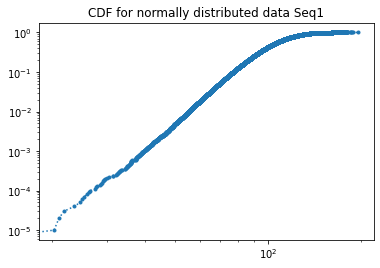

In [84]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data1['Seq1'])
plt.loglog(ecdf.x, ecdf.y, '.:')
plt.title('CDF for normally distributed data Seq1')

# Question 2

# a. Plot three cumulative distributions (for a, b & c) on the same figure. Use the largest of the available files for each. 

file: a
file: b
file: c


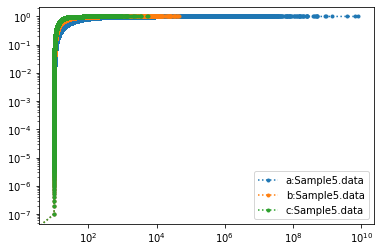

In [33]:
samples_path=os.chdir('/Users/Guz/Desktop/Majdal/complex/Ex2')
folders = os.listdir()
for fold in range(len(folders)):
    print('file:',folders[fold])
    os.chdir('/Users/Guz/Desktop/Majdal/complex/Ex2')
    os.getcwd()
    files = os.listdir(folders[fold])
    for file in files:
        os.chdir('C:/Users/Guz/Desktop/Majdal/complex/Ex2'+'/'+folders[fold])
        os.getcwd()
        if file=='Sample5.data':
            df=pd.read_csv(file,sep=",",names=[file])
            ecdf = ECDF(df[file])
            plt.loglog(ecdf.x, ecdf.y, '.:',label=f'{folders[fold]}:{file}')
            plt.legend()

file: a
file: b
file: c


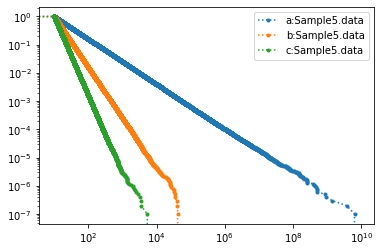

In [3]:
samples_path=os.chdir('/Users/Guz/Desktop/Majdal/complex/Ex2')
folders = os.listdir()
for fold in range(len(folders)):
    print('file:',folders[fold])
    os.chdir('/Users/Guz/Desktop/Majdal/complex/Ex2')
    os.getcwd()
    files = os.listdir(folders[fold])
    for file in files:
        os.chdir('C:/Users/Guz/Desktop/Majdal/complex/Ex2'+'/'+folders[fold])
        os.getcwd()
        if file=='Sample5.data':
            df=pd.read_csv(file,sep=",",names=[file])
            ecdf = ECDF(df[file])
            plt.loglog(ecdf.x,1-ecdf.y, '.:',label=f'{folders[fold]}:{file}')
            plt.legend()

# b. Using the cumulative distribution method, measure the exponent 𝛼 for each of the samples a, b & c. Would 𝛼 change significantly if smaller file would have been used? 

=> The value of alpha  varies as a function of sample size; the smaller samples have higher alphas than the larger ones.As the value of  alpha increases the change (positive/negative) in alpha between the samples increases. 

In [26]:
for fold in range(len(folders)):
    print('file:',folders[fold])
    os.chdir('/Users/Guz/Desktop/Majdal/complex/Ex2')
    os.getcwd()
    files = os.listdir(folders[fold])
    for file in files:
        os.chdir('C:/Users/Guz/Desktop/Majdal/complex/Ex2'+'/'+folders[fold])
        os.getcwd()
        df=pd.read_csv(file,sep=",",names=[file])
        ecdf = ECDF(df[file])
        x = ecdf.x
        y = 1-ecdf.y
        ## fitting to polynom
        p = np.polyfit(np.log10(x[1:-1]), np.log10(y[1:-1]), deg=1) 
        alpha=-p[0]+1
        results = powerlaw.Fit(df[file])
        print(file,':',f"Size:{len(df[file])}",' alpha:',alpha,f"Fitted Alpha={results.alpha:2.4f}.")

file: a
Sample1.data : Size:1000  alpha: 1.8099337613415294
Sample2.data : Size:10000  alpha: 1.7919741987850577
Sample3.data : Size:100000  alpha: 1.801608879383259
Sample4.data : Size:1000000  alpha: 1.7995183664586911
Sample5.data : Size:10000000  alpha: 1.8001873476734163
file: b
Sample1.data : Size:1000  alpha: 2.859784777445127
Sample2.data : Size:10000  alpha: 2.831361429068709
Sample3.data : Size:100000  alpha: 2.798517397469767
Sample4.data : Size:1000000  alpha: 2.801975578419327
Sample5.data : Size:10000000  alpha: 2.8008902815180496
file: c
Sample1.data : Size:1000  alpha: 3.849277809480308
Sample2.data : Size:10000  alpha: 3.8111382191061813
Sample3.data : Size:100000  alpha: 3.7855549543935303
Sample4.data : Size:1000000  alpha: 3.7984347439886323
Sample5.data : Size:10000000  alpha: 3.799909208036168


# c. For each of the smaller files assess mean, median and standard deviation. Arrange your measurements in the following table. 

In [23]:
for fold in range(len(folders)):
    print('file:',folders[fold])
    os.chdir('/Users/Guz/Desktop/Majdal/complex/Ex2')
    os.getcwd()
    files = os.listdir(folders[fold])
    for file in files:
        os.chdir('C:/Users/Guz/Desktop/Majdal/complex/Ex2'+'/'+folders[fold])
        os.getcwd()
        df=pd.read_csv(file,sep=",",names=[file])
        mu=df[file].mean()
        sigma=df[file].std()
        median=df[file].median()
        print(file,':',f"Size:{len(df[file])}, Mean: {mu:.4f}, Std:{sigma:.4f}, Median:{median:.4f}")

file: a
Sample1.data : Size:1000, Mean: 289.6340, Std:2748.2398, Median:23.2956
Sample2.data : Size:10000, Mean: 538.4522, Std:13481.3227, Median:24.7428
Sample3.data : Size:100000, Mean: 3420.9754, Std:636208.6674, Median:23.7771
Sample4.data : Size:1000000, Mean: 1559.8452, Std:307771.0585, Median:23.7418
Sample5.data : Size:10000000, Mean: 3829.9058, Std:3569316.0504, Median:23.7615
file: b
Sample1.data : Size:1000, Mean: 22.2812, Std:46.3610, Median:14.3500
Sample2.data : Size:10000, Mean: 22.0683, Std:37.5618, Median:14.7429
Sample3.data : Size:100000, Mean: 22.7202, Std:91.2868, Median:14.6934
Sample4.data : Size:1000000, Mean: 22.3993, Std:55.0997, Median:14.6911
Sample5.data : Size:10000000, Mean: 22.4849, Std:66.1190, Median:14.6993
file: c
Sample1.data : Size:1000, Mean: 15.5851, Std:14.9351, Median:12.6683
Sample2.data : Size:10000, Mean: 15.5249, Std:9.7667, Median:12.8589
Sample3.data : Size:100000, Mean: 15.5882, Std:10.7443, Median:12.8068
Sample4.data : Size:1000000, Me

# c. Use the plots of the distributions in (a) and the table in (c) to explain the effect of the exponent you found in (b) on statistical estimates of the distributions. What are the implications of your findings? 
    
     * In file c:when alpha> 3, the sample size almost doesnt affect the statistical estimates ( mean, std, variance ), almost constant for all the samples of file c.
     * In file b: when 2> alpha > 3, the mean also alomst constant, but the variance/std increases as the sample size increases.
     * In file a: when alpha <2,the mean and the variance/std has an infinite mean as the sample size increases. Any finite sample has a well-defined average, these averages fluctuate and occasionally take very large values. This implies that average fluctuates a lot and isn’t well-defined. Can take arbitrarily large values.   
     
     * we can see that the median (regardless of the value of alpha or the sample size) is well-defined: 𝑥1/2 = 21/ 𝛼−1∙ 𝑥𝑚𝑖n  

# Obtain a dataset that exhibits fat-tailed distribution, plot it and check whether it’s a power law distribution. 

In [4]:
import pandas as pd
os.chdir('/Users/Guz/Desktop/Majdal/complex')  
# read text file into pandas DataFrame
df = pd.read_csv("enwiki-20210820-words-frequency.txt", sep=" ",names=['word','frequency'],index_col=0)
  
# display DataFrame
df.head()

,frequency
word,
the,175029308
of,83135650
in,71869293
and,71473317
a,51438935


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676542 entries, the to li-fo
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   frequency  int64
dtypes: int64(1)
memory usage: 40.8+ MB


In [6]:
df.describe()

,frequency
count,2.676542e+06
mean,8.693522e+02
std,1.483515e+05
min,3.000000e+00
25%,5.000000e+00
50%,1.000000e+01
75%,2.900000e+01
max,1.750293e+08


In [126]:
df.sort_values(by="frequency",ascending=False).head(10)

,frequency
word,
the,175029308
of,83135650
in,71869293
and,71473317
a,51438935
to,49932244
was,30938036
is,23118881
for,20728143


In [33]:
results = powerlaw.Fit(df['frequency'])

Calculating best minimal value for power law fit


In [34]:
print('xmin:',results.power_law.xmin)
print(f"Alpha={results.alpha:2.4f}. ")

xmin: 15.0
Alpha=1.6946. 


In [8]:
print('number of word with frequency less than 100:',len(df.loc[df['frequency'] < 100]))

number of word with frequency less than 100: 2393546


In [9]:
print('number of word with frequency more than 100:',len(df.loc[df['frequency'] > 100]))

number of word with frequency more than 100: 281037


In [10]:
data=df['frequency'].to_numpy()

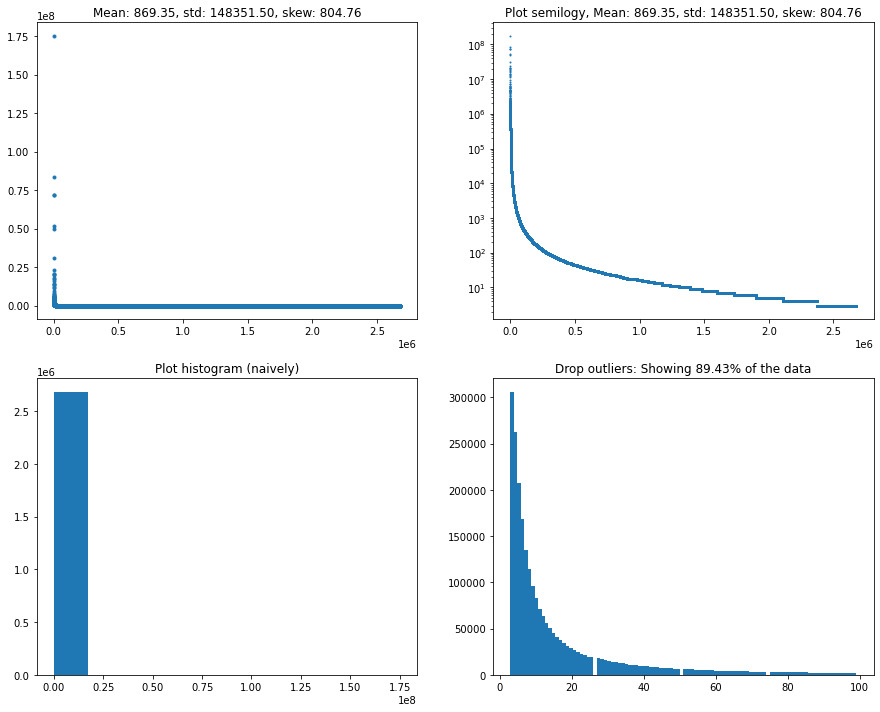

In [119]:
fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

for i in range(2):
    
    for j in range(2):
        
        if i==0 and j==0:
            
            ax[i][j].plot(data,'.')
            ax[i][j].set_title(f"Mean: {data.mean():2.2f}, std: {data.std():2.2f}, skew: {skew(data):2.2f}");

        
        if i==0 and j==1:
  
            ax[i][j].plot(data,'.', markersize=2)
            ax[i][j].set_title(f"Plot semilogy, Mean: {data.mean():2.2f}, std: {data.std():2.2f}, skew: {skew(data):2.2f}");
            ax[i][j].set_yscale('log')

            
        if i==1 and j==0:
            
            ax[i][j].hist(data)
            ax[i][j].set_title("Plot histogram (naively)");
            

        if i==1 and j==1:

            ax[i][j].hist(data[data<100], 100);
            ax[i][j].set_title(f'Drop outliers: Showing { 100*np.mean(data<100):2.2f}% of the data');
      

Fit results: alpha=-0.6488876503412693, const = 0.3293285854936177


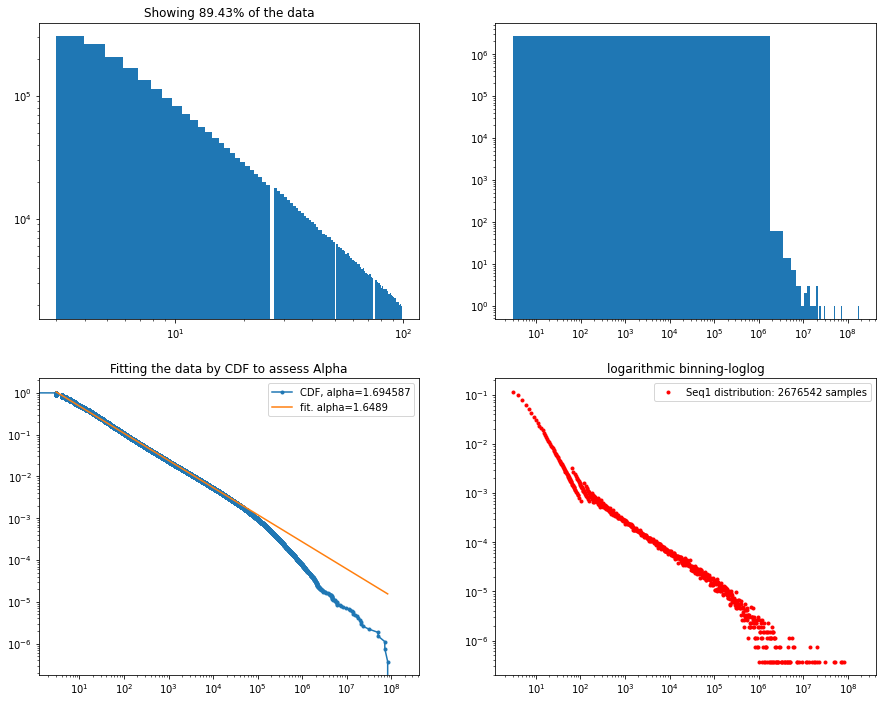

In [38]:
#Viewing power law distribution in several scale options
alpha=1.694587
sigma=148351.5
mu=869.35
fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

for i in range(2):
    for j in range(2):
        
        if i==0 and j==0: 
            
            ax[i][j].hist(data[data<100], 100);
            ax[i][j].set_title(f'Showing { 100*np.mean(data<100):2.2f}% of the data');
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
        
        if i==0 and j==1:
            

            ax[i][j].hist(data, 100);
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
            
        if i==1and j==0:
            ecdf = ECDF(data)
            x = ecdf.x
            y = 1-ecdf.y
            ## fitting to polynom
            p = np.polyfit(np.log10(x[1:-1]), np.log10(y[1:-1]), deg=1) 
            print(f"Fit results: alpha={p[0]}, const = {p[1]}")
            ax[i][j].plot(x, y, '.-', label=f'CDF, alpha={alpha}');
            ax[i][j].plot(x[1:-1], np.power(10, np.polyval(p, np.log10(x[1:-1]))), label=f'fit. alpha={-p[0]+1:4.4f}' );
            ax[i][j].legend()
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
            ax[i][j].set_title('Fitting the data by CDF to assess Alpha')
            
        if i==1 and j==1:
            x = np.logspace(np.log10(data.min()),np.log10(data.max()),1000 )
            y_data, x  = np.histogram(data, x)
            x = (x[1:] + x[:-1])/2.
            ax[i][j].plot(x, y_data/y_data.sum(), '.', color = 'red',label=f'Seq1 distribution: {len(data)} samples')
            ax[i][j].legend()
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log') 
            ax[i][j].set_title('logarithmic binning-loglog')

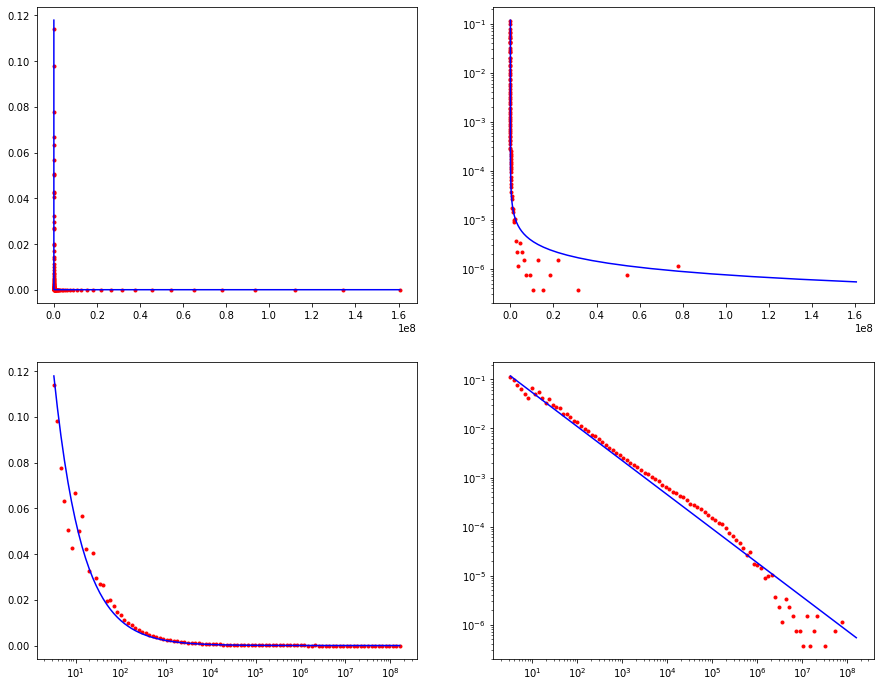

In [41]:
# plotting the distribution estimated from variates
x = np.logspace(np.log10(data.min()), np.log10(data.max()), 100)
y_data, x  = np.histogram(data, x)
x = (x[1:] + x[:-1])/2.
y_theory = x**(-alpha+1) # there is shift 

fig, ax  = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x, y_data/y_data.sum(), '.', color = 'red',label=f'Actual distribution: {len(data)} samples')
        ax[i][j].plot(x,y_theory/y_theory.sum() , color='blue', label='Power Law')
        if i==1 and j==0:
            ax[i][j].set_xscale('log')
        if i==0 and j==1:
            ax[i][j].set_yscale('log')
        if i==1 and j==1:
            ax[i][j].set_xscale('log')            
            ax[i][j].set_yscale('log')            